In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
x = [np.log(i) for i in range(1,100)]

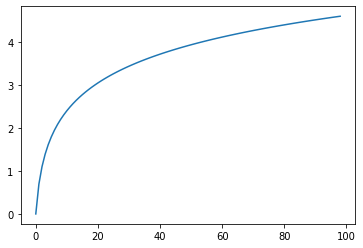

In [3]:
plt.plot(x)

# Defining signal

In [4]:
# Heaviside step function. I use eta to be consistent with my professor's notation
def eta(x):
    r = 0
    if x > 0:
        r = 1
    if x == 0:
        r = 0.5
    return r

In [5]:
def theta(t, tau):
    return eta(t / tau) - eta(t / (tau - 1))

In [6]:
# My signal
@np.vectorize
def s(t, tau, n, A):
    return ((-1)**n) * A * (1 - abs(2 * t / (tau - 1))) * np.sin((2 * np.pi * n * t) / tau) * theta(t, tau)

# Plotting with different args:

In [7]:
def plot(t, tau, n, A):
    x = np.linspace(0, t, 1024)
    y = s(x, tau, n, A)
    plt.figure()
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("s(t)")
    plt.show()

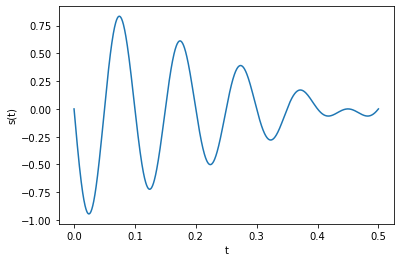

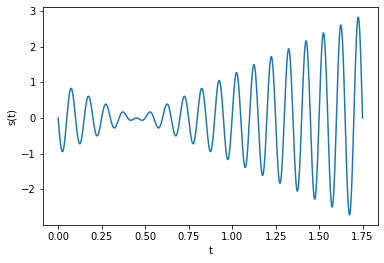

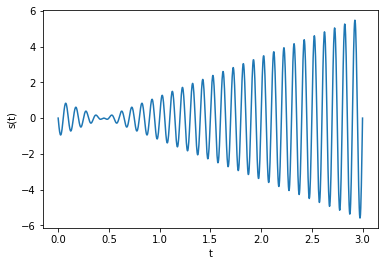

In [8]:
for i in np.linspace(0.5, 3, 3):
    plot(i, 0.1, 1, 1) 

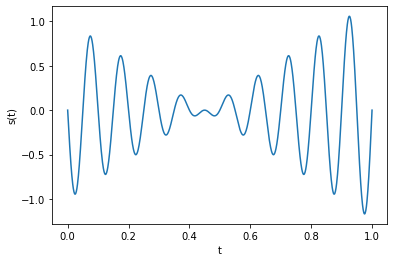

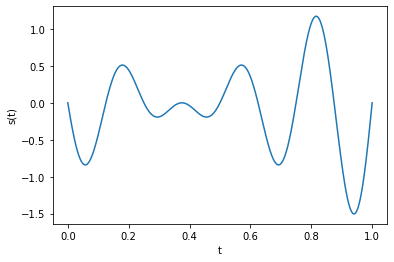

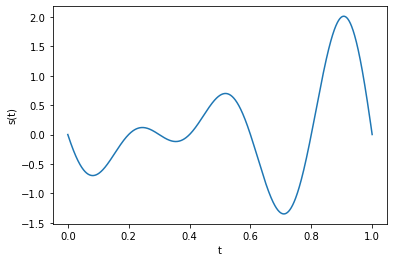

In [9]:
for tau in np.linspace(0.1, 0.4, 3):
    plot(1, tau, 1, 1)

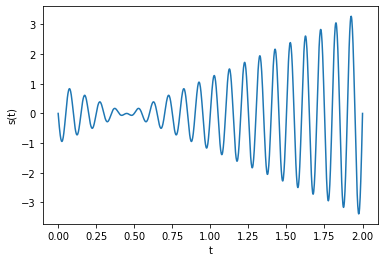

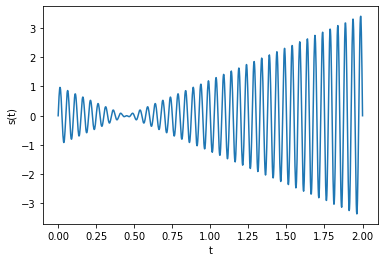

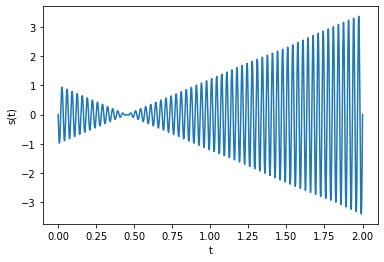

In [10]:
#for diffrent n
for n in range(1, 4):
    plot(2, 0.1, n, 1) 

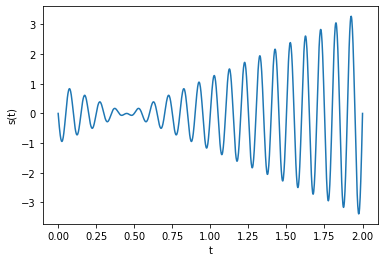

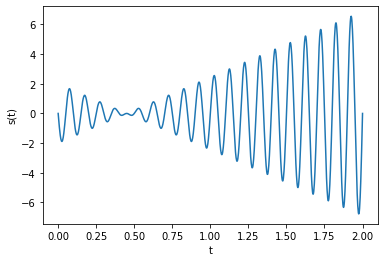

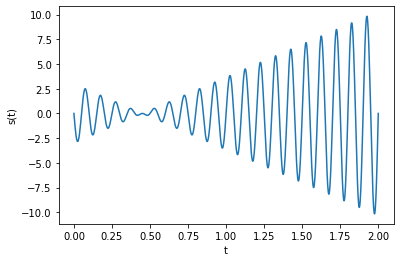

In [11]:
for a in range(1, 4):
    plot(2, 0.1, 1, a) 

#  Doing some DFT

In [12]:
from scipy import fftpack
from scipy.fft import rfft, rfftfreq, fft, ifft

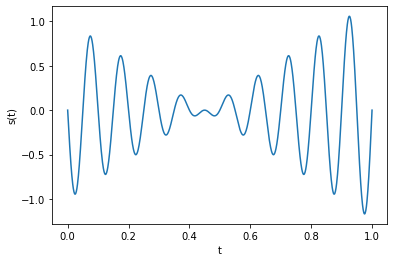

In [13]:
x = np.linspace(0, 1, 1024)
y = s(x, 0.1, 1, 1)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('t')
ax.set_ylabel('s(t)');

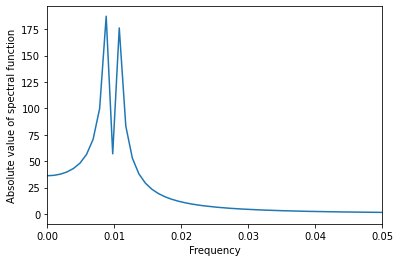

In [14]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()
ax.plot(freqs, np.abs(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Absolute value of spectral function')
ax.set_xlim(0, 0.05)
plt.show()

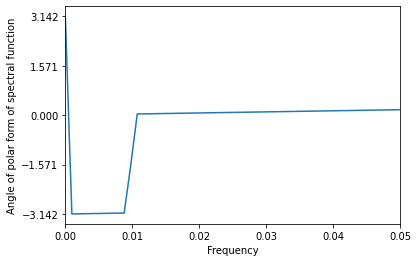

In [15]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.angle(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of polar form of spectral function')
ax.set_xlim(0, 0.05)
plt.yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.show()

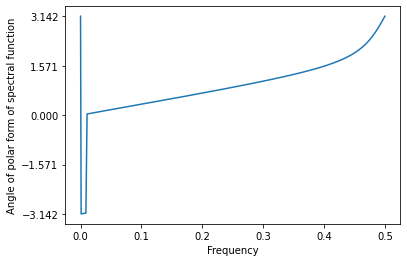

In [16]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.angle(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of polar form of spectral function')
plt.yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.show()

# Invers FFT & Gibbs-like phenomenon after the removal of high freqs

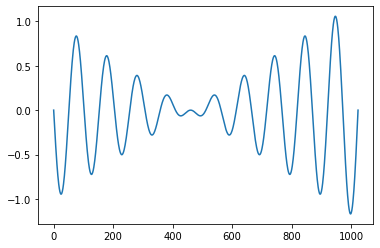

In [17]:
plt.plot(y)

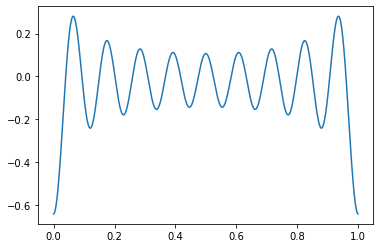

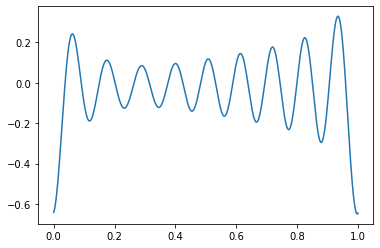

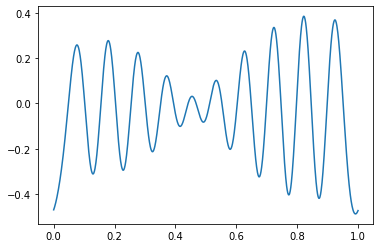

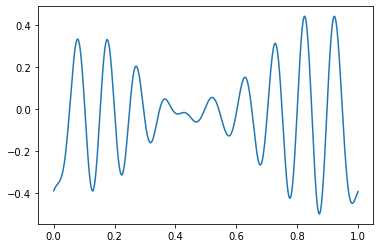

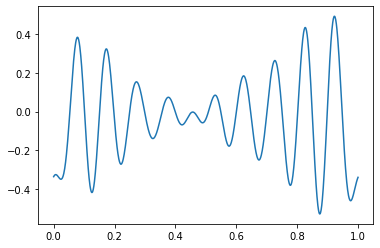

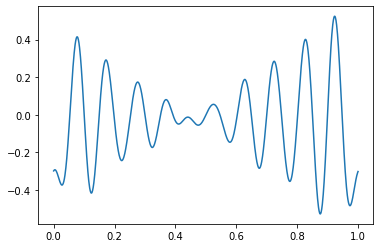

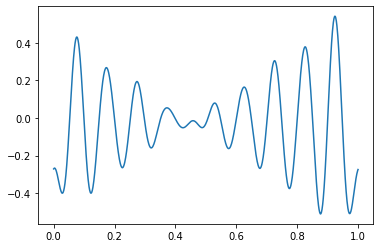

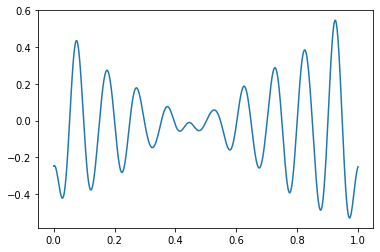

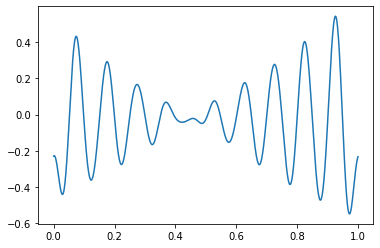

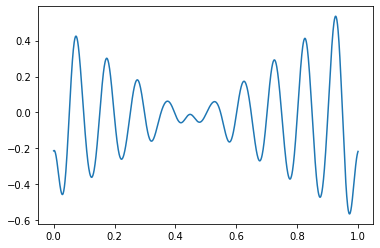

In [18]:
# zeroing high frequency points in the spectral function & doing inverse fft
for i in range(10, 20):
    sp = fft(y)
    sp[i: ] = 0
    plt.plot(x, ifft(sp).real)
    plt.show()

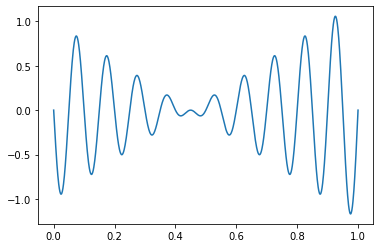

In [19]:
# comparng with the actual signa; not bad for just 20 non zero points left in the spectrum
plt.plot(x, y)

# DFT with windows

In [20]:
from scipy import signal

In [21]:
help(signal.stft)

Help on function stft in module scipy.signal.spectral:

stft(x, fs=1.0, window='hann', nperseg=256, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1)
    Compute the Short Time Fourier Transform (STFT).
    
    STFTs can be used as a way of quantifying the change of a
    nonstationary signal's frequency and phase content over time.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length must be nperseg. Defaults
        to a H

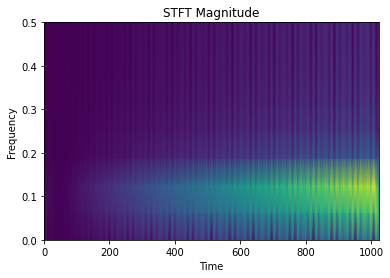

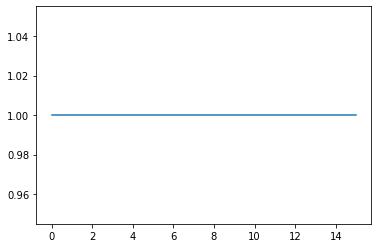

In [22]:
x = np.linspace(0, 10, 1024)
y = s(x, 0.1, 1, 1)
f, t, Zxx = signal.stft(y, nperseg=16, window=signal.get_window('boxcar', 16))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

plt.plot(signal.get_window('boxcar', 16))

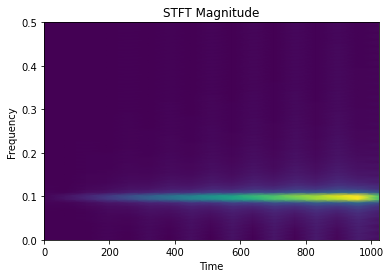

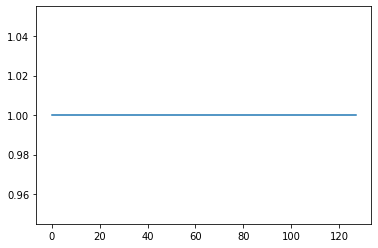

In [23]:
x = np.linspace(0, 10, 1024)
y = s(x, 0.1, 1, 1)
f, t, Zxx = signal.stft(y, nperseg=128, window=signal.get_window('boxcar', 128))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

plt.plot(signal.get_window('boxcar', 128))

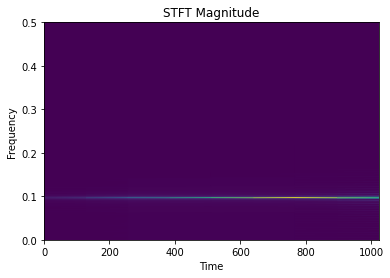

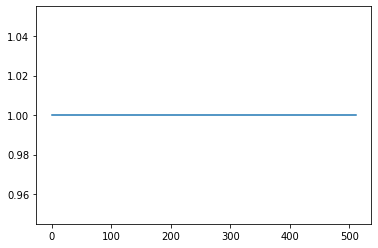

In [24]:
x = np.linspace(0, 10, 1024)
y = s(x, 0.1, 1, 1)
f, t, Zxx = signal.stft(y, nperseg=512, window=signal.get_window('boxcar', 512))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

plt.plot(signal.get_window('boxcar', 512))

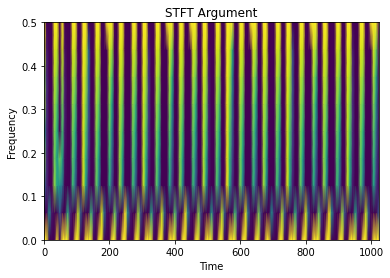

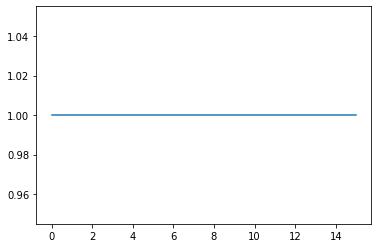

In [25]:
x = np.linspace(0, 10, 1024)
y = s(x, 0.1, 1, 1)
f, t, Zxx = signal.stft(y, nperseg=16, window=signal.get_window('boxcar', 16))
plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
plt.title('STFT Argument')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

plt.plot(signal.get_window('boxcar', 16))

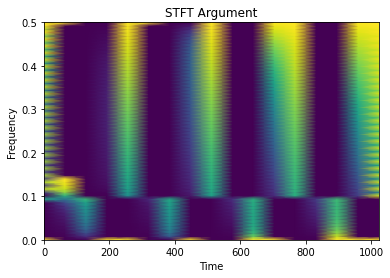

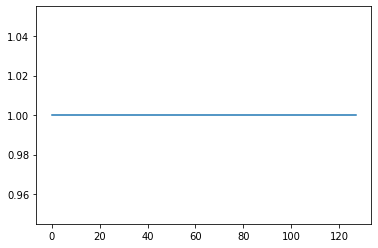

In [26]:
x = np.linspace(0, 10, 1024)
y = s(x, 0.1, 1, 1)
f, t, Zxx = signal.stft(y, nperseg=128, window=signal.get_window('boxcar', 128))
plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
plt.title('STFT Argument')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

plt.plot(signal.get_window('boxcar', 128))

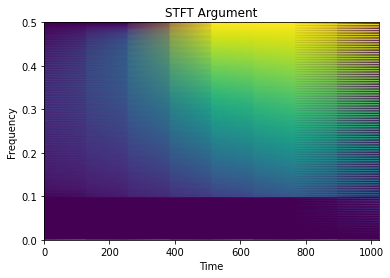

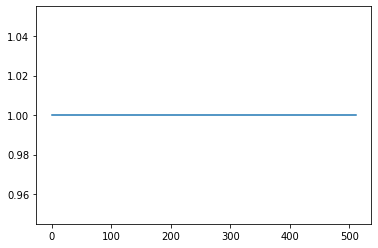

In [27]:
x = np.linspace(0, 10, 1024)
y = s(x, 0.1, 1, 1)
f, t, Zxx = signal.stft(y, nperseg=512, window=signal.get_window('boxcar', 512))
plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
plt.title('STFT Argument')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

plt.plot(signal.get_window('boxcar', 512))

In [28]:
print("O")
def transform_boxcar(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.show()

    plt.plot(signal.get_window('boxcar', wdth))
    plt.show()

O


In [139]:
def transform_gabor(wdth):
    wndw = signal.general_gaussian(wdth, p=1.5, sig=7)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.show()

    plt.plot(signal.general_gaussian(wdth, p=1.5, sig=7))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

In [52]:
def transform_boxcar(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')
    plt.show()

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

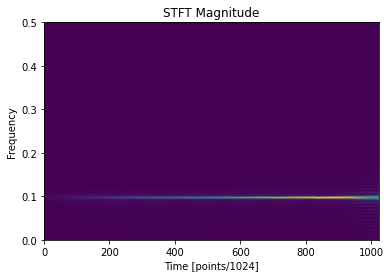

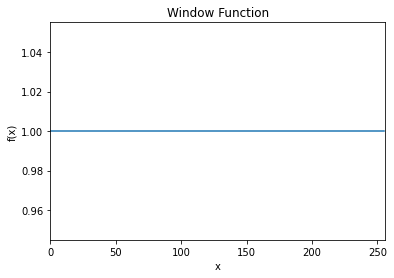

In [58]:
transform_boxcar(256)

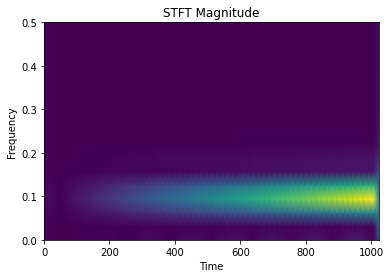

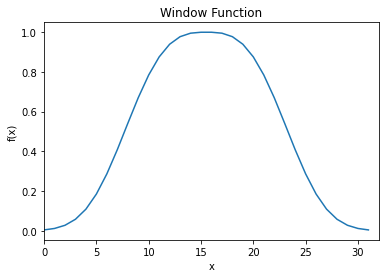

In [60]:
transform_gabor(32)

In [98]:
def transform_boxcar_arg(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
    plt.title('STFT Magnitude')
    fig.colorbar(cmap)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')
    plt.show()

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

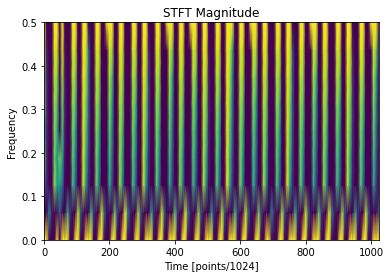

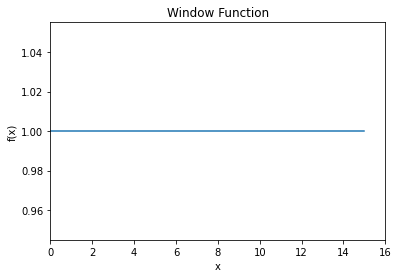

In [99]:
transform_boxcar_arg(16)

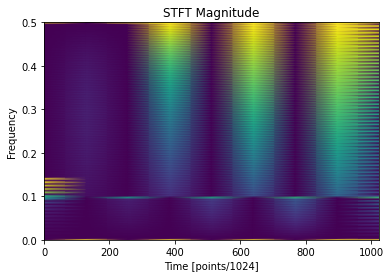

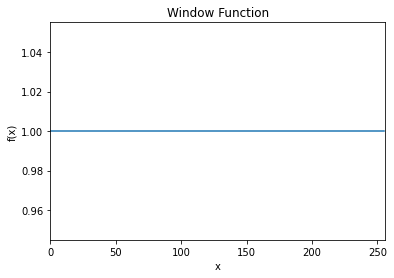

In [68]:
transform_boxcar_arg(256)

TypeError: 'QuadMesh' object is not subscriptable

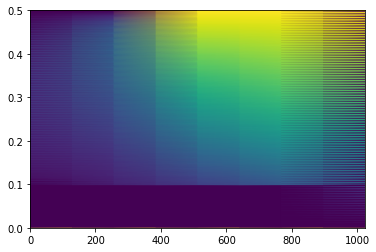

In [101]:
type(plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')[0])

In [87]:
def transform_boxcar_arg(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    plt.imshow(np.angle(Zxx))
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')
    plt.show()

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()
    print(np.angle(Zxx).shape)

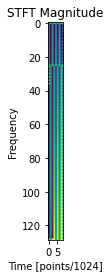

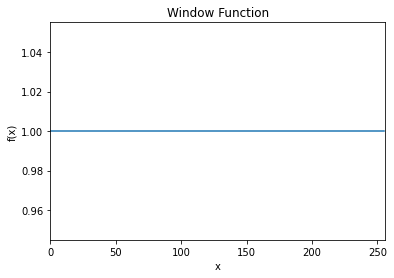

(129, 9)


In [88]:
transform_boxcar_arg(256)

In [90]:
help(np.random.RandomState)

Help on class RandomState in module numpy.random.mtrand:

class RandomState(builtins.object)
 |  RandomState(seed=None)
 |  
 |  Container for the slow Mersenne Twister pseudo-random number generator.
 |  Consider using a different BitGenerator with the Generator container
 |  instead.
 |  
 |  `RandomState` and `Generator` expose a number of methods for generating
 |  random numbers drawn from a variety of probability distributions. In
 |  addition to the distribution-specific arguments, each method takes a
 |  keyword argument `size` that defaults to ``None``. If `size` is ``None``,
 |  then a single value is generated and returned. If `size` is an integer,
 |  then a 1-D array filled with generated values is returned. If `size` is a
 |  tuple, then an array with that shape is filled and returned.
 |  
 |  **Compatibility Guarantee**
 |  
 |  A fixed bit generator using a fixed seed and a fixed series of calls to
 |  'RandomState' methods using the same parameters will always produce

In [92]:
print(np.random.RandomState(42))

RandomState(MT19937)


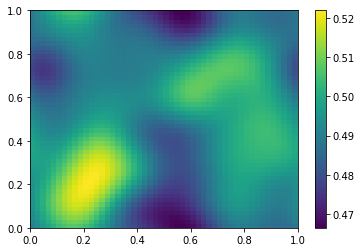

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

# Generate data for the plot
x = np.linspace(0, 1, 51)
y = np.linspace(0, 1, 51)
z = gaussian_filter(r.random_sample([50, 50]), sigma=5, mode='wrap')

# Generate the plot
fig, ax = plt.subplots()
cmap = ax.pcolormesh(x, y, z)
fig.colorbar(cmap)
plt.show(fig)

In [114]:
def transform_boxcar_arg(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

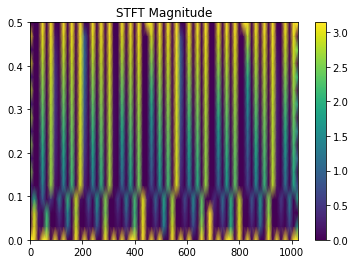

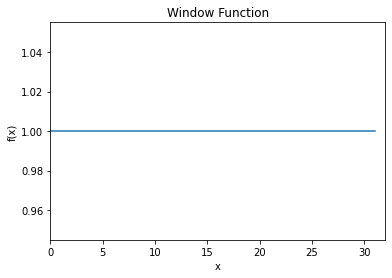

In [115]:
transform_boxcar_arg(32)

window width = 16


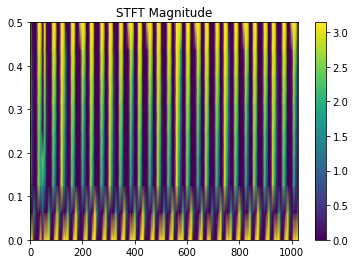

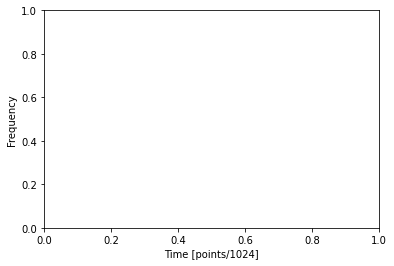

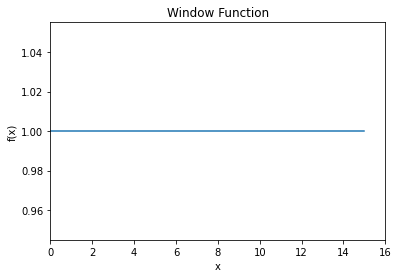

window width = 256


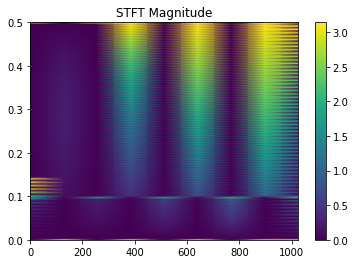

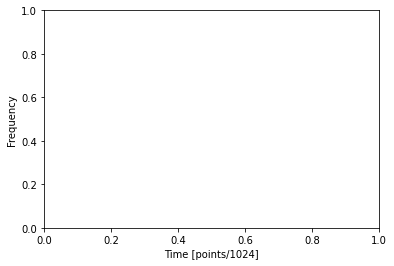

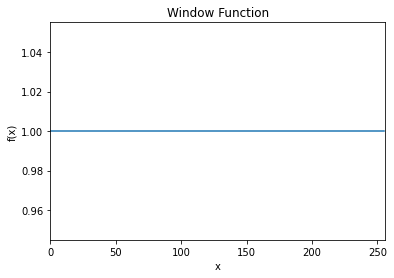

window width = 512


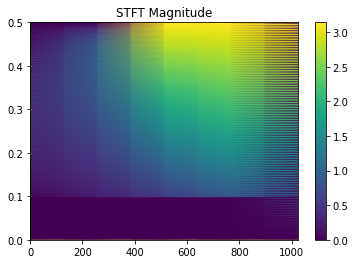

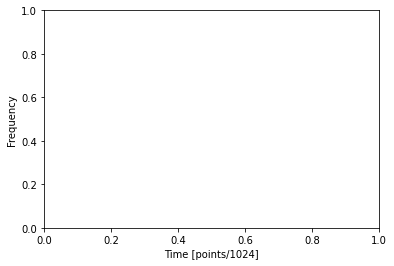

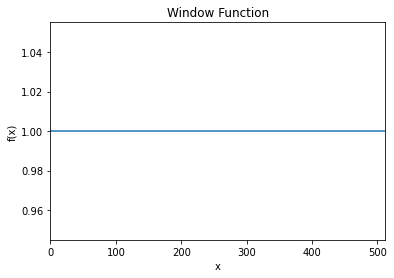

In [111]:
for i in [16, 256, 512]:
    print("window width =", i)
    transform_boxcar_arg(i)

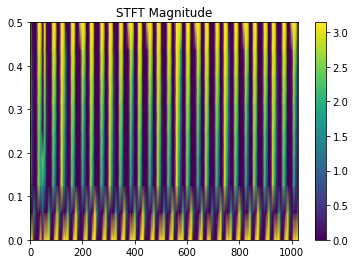

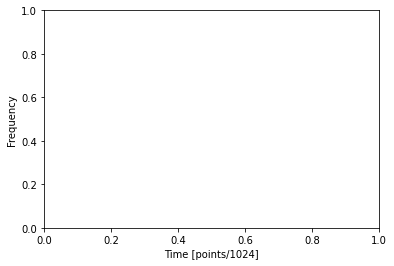

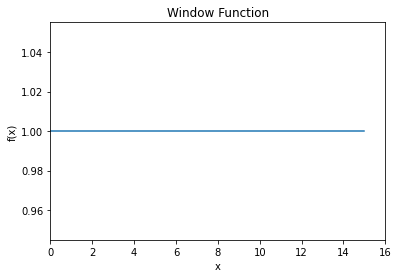

In [112]:
transform_boxcar_arg(16)

In [117]:
def transform_boxcar_abs(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.title('STFT Magnitude')
    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

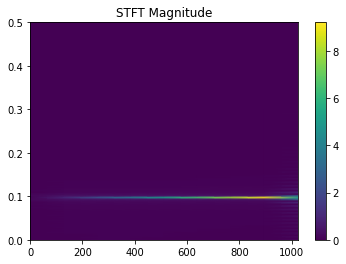

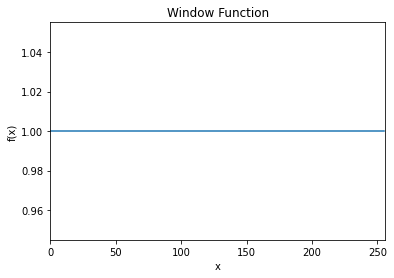

In [118]:
transform_boxcar_abs(256)

In [132]:
def transform_gabor_arg(wdth):
    wndw = signal.general_gaussian(wdth, p=1.5, sig=7)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.title('STFT Magnitude')
    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

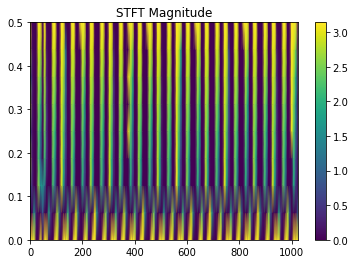

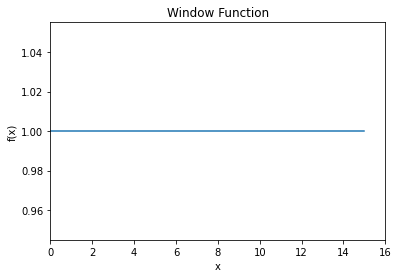

In [129]:
transform_gabor_arg(16)

In [131]:
def transform_gabor_abs(wdth):
    wndw = signal.general_gaussian(wdth, p=1.5, sig=7)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.title('STFT Magnitude')
    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(signal.get_window('boxcar', wdth))
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

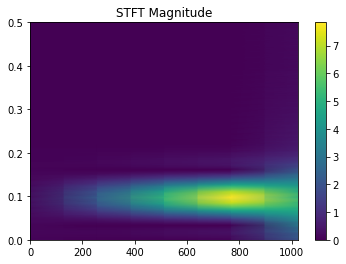

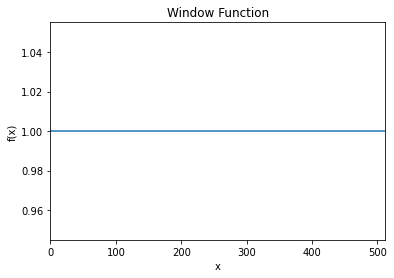

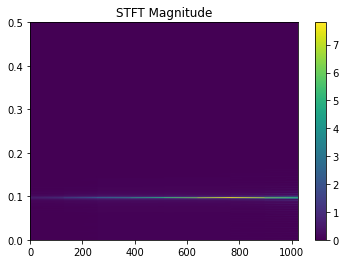

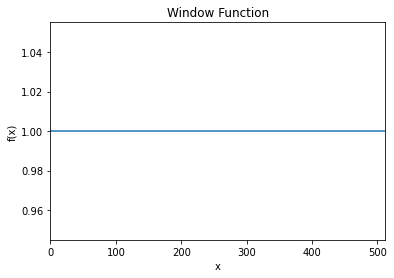

In [137]:
transform_gabor_abs(512)
transform_boxcar_abs(512)

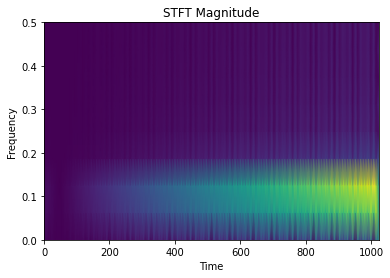

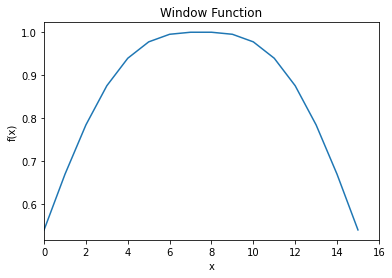

In [143]:
transform_gabor(16)